In [26]:
import gdal
import numpy as np
import sys
import argparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
# this allows GDAL to throw Python Exceptions
gdal.UseExceptions()


In [10]:
src_ds = gdal.Open( "/home/malavika/clippedimage.tif" )
src_band = src_ds.GetRasterBand(1).ReadAsArray().astype(np.float).flatten()
no_data_val = src_ds.GetRasterBand(1).GetNoDataValue()
no_data_index = np.where(src_band==no_data_val)
src_band_array = np.delete(src_band,no_data_index)


In [11]:
kmeans = sklearn.cluster.KMeans(n_clusters = 11).fit(src_band_array.reshape(-1,1))
cluster_center = np.array(kmeans.cluster_centers_)

In [33]:
clr_file = pd.read_csv("/home/malavika/clrTxtFile.txt", header=None, delim_whitespace=True)
clr_file.loc[:10,0] = sorted(cluster_center)
pd_clr_file = pd.DataFrame(clr_file)
pd_clr_file.to_csv("/home/malavika/clr_file.txt", sep = " ", float_format='string', header=None, index=None)

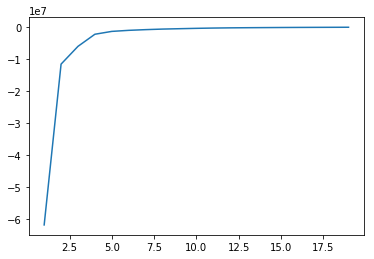

In [28]:
scores = []
for i in range(1,20):
    scores.append(sklearn.cluster.KMeans(n_clusters = i).fit(src_band_array.reshape(-1,1)).score(src_band_array.reshape(-1,1))) 
plt.plot(range(1,20),scores)
plt.show()

In [31]:
print(scores)


[-61903505.658104397, -11658589.523013595, -6108493.6174502959, -2326850.0711954627, -1436166.0763653521, -1107219.7877431896, -887467.77924827603, -713192.2312888978, -595710.89489229152, -482021.28994786349, -392790.77839739388, -327806.20307372173, -285082.38159916137, -250699.01438837004, -220423.65701288811, -194483.01436541669, -174759.09600142651, -157344.98137986526, -138852.70680246677]
The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.
